In [86]:
import random
with open("names.txt", "r+") as f:
	words = f.read().splitlines()
	words = [word.strip() for word in words] # get rid of any trailing spaces
	words = [w for w in words if w] # get rid of any empty strings
	names = sorted(words, key=lambda x: random.random())
	
with open("names.txt", "w") as f: 
	joined = "\n".join(names)
	f.write(joined)


min_chars = min(len(v) for v in words)
max_chars = max(len(v) for v in words)
chars = sorted(list(set("".join(names))))
chars += ['<S>', '<E>']

print("names: ", names[:5])
print("number of names: ", len(names))
print("(list of chars, count): ", ("".join(chars), len(chars)))
print("(max word length, min word length): ", (max_chars, min_chars))

# adding start and end token to each name
names = [['<S>'] + list(name) + ['<E>'] for name in names]


names:  ['camber', 'aidy', 'rally', 'chrystopher', 'ankit']
number of names:  32033
(list of chars, count):  ('abcdefghijklmnopqrstuvwxyz<S><E>', 28)
(max word length, min word length):  (15, 2)


In [87]:
b = {}
for name in names:
	for ch1, ch2 in zip(name, name[1:]):
		bigram = (ch1, ch2)
		b[bigram] = b.get(bigram, 0) + 1

b = sorted(b.items(), key = lambda kv: -kv[1])
print("max bigram occurance: ", b[0])
print("min bigram occurance: ", b[-1])
b = dict(b)

max bigram occurance:  (('n', '<E>'), 6763)
min bigram occurance:  (('z', 'x'), 1)


In [88]:
#import torch
N = []

# a replacement until pytorch starts to work again
for i in range(28):
    N.append([])
    for j in range(28):
        N[i].append(1) # for smoothening the array
assert len(N) == 28
assert len(N[0]) == 28
#N = torch.zeros((28, 28), dtype=torch.int32)

atoi = {ch:i for i,ch in enumerate(chars)}
itoa = {i:ch for i,ch in enumerate(chars)}

for name in names:
	for ch1, ch2 in zip(name, name[1:]):
		ix1, ix2 = atoi[ch1], atoi[ch2]
		N[ix1][ix2] += 1


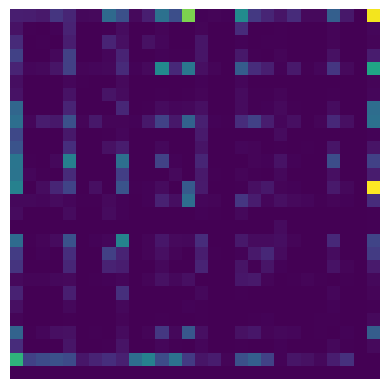

In [89]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.axis("off")
plt.imshow(N)

In [90]:
# Normalization of N
import numpy as np
P = np.array(N, dtype=np.float64)
print(len(P[0]), len(P))
print(P.size, P[0].size)
for i in range(28):
    s = P[i].sum()
    P[i] = P[i] / s


# normalization test
for i in range(28):
    assert P[i].sum() < 1.01 and P[i].sum() > 0.99, "print " + str(P[i].sum())

28 28
784 28


In [91]:
np.multinomial()

AttributeError: module 'numpy' has no attribute 'multinomial'

### Bigram model
- Bigram (one character predicts the next one with a lookup table of counts)

In [37]:
# import torch 
# torch.zeros((3, 5), dtype=torch.int32)
# N = torch.zeros((28,28), dtype=torch.int32)


ModuleNotFoundError: No module named 'torch'

In [38]:
import math
import torch.nn as nn

class NewGELU(nn.Module):
    """
    Implementation of the GELU activation function currently in Google BERT repo (identical to OpenAI GPT).
    Reference: Gaussian Error Linear Units (GELU) paper: https://arxiv.org/abs/1606.08415
    """
    def forward(self, x):
        return 0.5 * x * (1.0 + torch.tanh(math.sqrt(2.0 / math.pi) * (x + 0.044715 * torch.pow(x, 3.0))))


ModuleNotFoundError: No module named 'torch'